In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [9]:
boston.data_module

'sklearn.datasets.data'

In [13]:
bostondf = pd.DataFrame(boston.data,columns=boston.feature_names)

In [14]:
bostondf['PRICE'] = boston.target

In [15]:
bostondf.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [16]:
bostondf.shape

(506, 14)

In [17]:
bostondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:
bostondf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

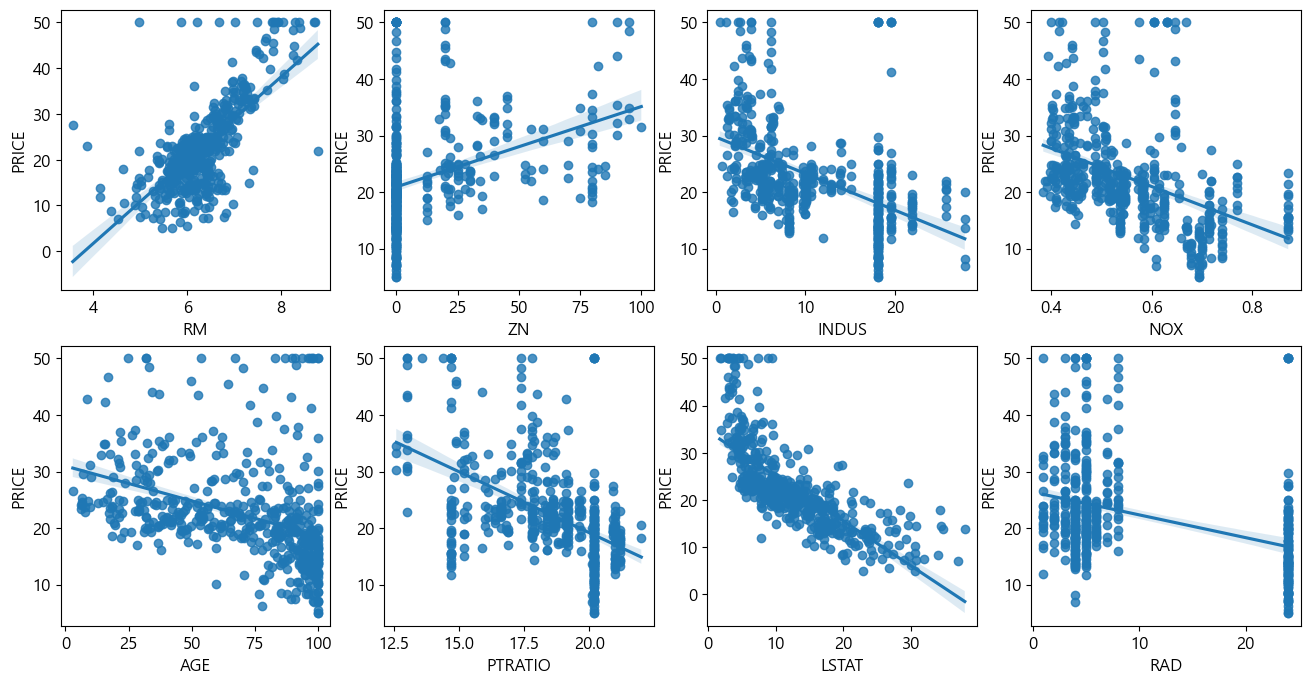

In [19]:
lm_features = ['RM','ZN','INDUS','NOX','AGE', 'PTRATIO','LSTAT','RAD']
fig ,axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
for  i ,feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature,y='PRICE', data=bostondf, ax=axs[row][col])

In [21]:
y_target = bostondf['PRICE']
X_data = bostondf.drop(columns='PRICE')
X_train,X_test,y_train,y_test = train_test_split(X_data,
                                                 y_target,
                                                 test_size=0.3,
                                                 random_state=156)

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)
print(f'mse:{mse:.3f}, rmse:{rmse:.3f}, r2:{r2:.3f}')

mse:17.297, rmse:4.159, r2:0.757


In [25]:
print('절편:',lr.intercept_)
print('회귀계수값:',np.round(lr.coef_,1))

절편: 40.99559517216473
회귀계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [26]:
X_test[:1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
210,0.17446,0.0,10.59,1.0,0.489,5.96,92.1,3.8771,4.0,277.0,18.6,393.25,17.27


In [30]:
y_preds[:1]

array([23.15424087])

In [32]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [33]:
from sklearn.model_selection import cross_val_score

In [35]:
y = bostondf['PRICE'] 
X = bostondf.drop(columns='PRICE')
lr = LinearRegression()
neg_mse = cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)

In [40]:
-neg_mse

array([12.46030057, 26.04862111, 33.07413798, 80.76237112, 33.31360656])

In [38]:
np.mean(-neg_mse) #교차검증,mse

37.13180746769912

In [39]:
np.sqrt(np.mean(-neg_mse)) #교차검증,rmse

6.093587405436892